In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from math import sqrt
from collections import defaultdict
from sklearn.metrics import accuracy_score
import random
import operator

In [7]:
data_size = 21 

In [8]:
def find_best_DT(id):
    data_train = pd.read_csv("data/"+id+"_train.csv")
    data_test = pd.read_csv("data/"+id+"_test.csv")
    X_train, y_train = data_train.drop('y',axis=True), data_train['y']
    X_test, y_test = data_test.drop('y',axis=True), data_test['y']
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train,y_test])
    params = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'),
             'max_depth' : [i for i in range(1,10)]}
    cvs = GridSearchCV(DecisionTreeClassifier(),params)
    cvs = cvs.fit(X,y)
    tree = DecisionTreeClassifier(criterion=cvs.best_params_['criterion'],
                                  max_depth=cvs.best_params_['max_depth'],
                                  splitter=cvs.best_params_['splitter'])
    tree =tree.fit(X_train,y_train)
    
    return cvs.best_params_,cvs.best_score_

In [9]:
def build_forest(id):
    data_train = pd.read_csv("data/"+id+"_train.csv")
    data_test = pd.read_csv("data/"+id+"_test.csv")
    d_list_test = [defaultdict(lambda : 0) for _ in range(len(data_test))]
    d_list_train = [defaultdict(lambda : 0) for _ in range(len(data_train))]

    for i in range(100):
        data_train_sample = data_train.sample(len(data_train),replace=True)
        X_train, y_train = data_train_sample.drop('y',axis=True), data_train_sample['y']
        X_test, y_test = data_test.drop('y',axis=True), data_test['y']    
        features = random.sample(list(X_train.columns), k = int((sqrt(len(X_train.columns))+1)))
        X_train = X_train[features]
        X_test = X_test[features]
        clf = DecisionTreeClassifier(criterion='entropy')
        clf = clf.fit(X_train,y_train)
        y_test_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
        for pos,v in enumerate(y_test_pred):
            d_list_test[pos][v]+=1
        for pos,v in enumerate(y_train_pred):
            d_list_train[data_train_sample.index[pos]][v]+=1
    y_test_pred = [max(res, key=lambda key: res[key]) for res in d_list_test]
    y_train_pred = [max(res, key=lambda key: res[key]) for res in d_list_train]
    return accuracy_score(data_test['y'],y_test_pred),accuracy_score(data_train['y'],y_train_pred)

In [10]:
ids = [str(i).zfill(2) for i in range(1,22)]
summary = pd.DataFrame(columns=["id","max_depth", "criterion",'splitter','score',"forest_test_score", "forest_train_score"])
for id in ids:
    best_parmeters_id,score_id = find_best_DT(id)
    forest_test_id, forest_train_id = build_forest(id)
    summary.loc[int(id)-1]=[int(id),best_parmeters_id['max_depth'],best_parmeters_id['criterion'],best_parmeters_id['splitter'],score_id, forest_test_id, forest_train_id]


C:\Users\Demid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [11]:
def draw(id,params):
    data_train = pd.read_csv("data/"+id+"_train.csv")
    data_test = pd.read_csv("data/"+id+"_test.csv")
    X_train, y_train = data_train.drop('y',axis=True), data_train['y']
    X_test, y_test = data_test.drop('y',axis=True), data_test['y']
    trees = [DecisionTreeClassifier(max_depth = i,criterion= params['criterion'],splitter = params['splitter'])
             .fit(X_train,y_train) for i in range(1,20)]
    train_score = [accuracy_score(y_train, tree.predict(X_train)) for tree in trees]
    test_score = [accuracy_score(y_test, tree.predict(X_test)) for tree in trees]
    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot([i for i in range(1,20)], train_score, label = 'DT train')
    ax.plot([i for i in range(1,20)], test_score, label = 'DT test')
    ax.set_title("Comparing max depth of tree and score")
    ax.set_xlabel('Max depth')
    ax.set_ylabel('Accuracy score')
    ax.legend()
    plt.show()

In [12]:
summary

,id,max_depth,criterion,splitter,score,forest_test_score,forest_train_score
0,1,3,entropy,best,0.972758,0.898741,1.0
1,2,9,entropy,best,0.763359,0.221883,1.0
2,3,1,gini,best,0.976133,0.865959,1.0
3,4,5,entropy,best,0.975478,0.545391,1.0
4,5,1,gini,best,0.984848,0.932900,1.0
5,6,3,entropy,best,0.980132,0.591060,1.0
6,7,3,entropy,best,0.973721,0.507442,1.0
7,8,2,entropy,best,0.989605,0.970894,1.0
8,9,8,entropy,best,0.840196,0.388235,1.0
9,10,4,entropy,best,0.970221,0.903018,1.0


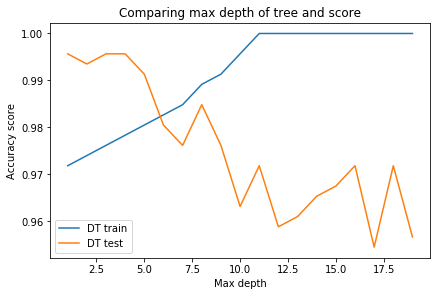

In [13]:
draw("05",{'criterion':'gini','splitter':'best'})

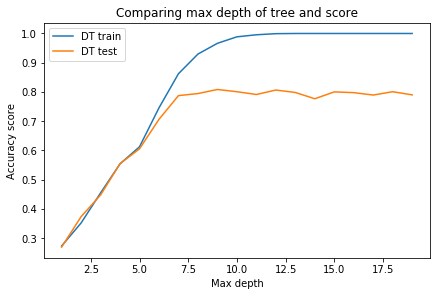

In [14]:
draw("21",{'criterion':'entropy','splitter':'best'})

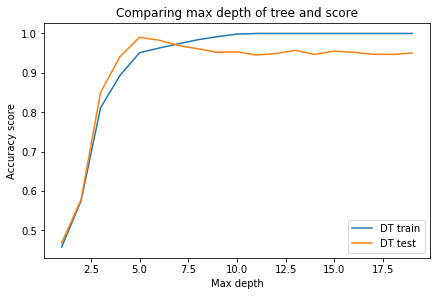

In [15]:
draw("14",{'criterion':'entropy','splitter':'best'})